# Vision Zero, Chicago, modeling car crashes with injuries.

# Overview
I was hired by a government agency CMAP (Chicago Metropolitan Agency for Planning) to create a model which predicts injuries during car crashes based on information collected by Chicago Police Department (CPD). I  concluded that there are many features that determine the oucome of car crash(overall 200 features, only 31 were used in our model), some of them: type of crash , day, season, time, type of crash, are there injuried people, phyesical imparement factors(drugs, alchogol, distraction etc), speed limit, weather, lightning and road conditions etc .

To acheive my goal, I trained more than 100 models and tuned hyperparameters, model types that were used: 
- LogisticRegression
- KNN
- Naive Bayes(different type) 
- DecisionTree
- Random Forest
- ADA Boost
- Gradient boost
- XGB Classifier


# Business Understanding
Our stakeholder wants to understand what factors of crash influence on injury outcome as the last possible outcome. They perfectly understand that car crashes will be happening but they want to reduce the number of injuries because individual health prevails under public mobility. 

# Data

1) Database Traffic Crashes - Crashes. Years: 2017 - now
Provided by City of Chicago

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if 

2) Database Traffic Crashes - People. Years: 2017 - now
Provided by City of Chicago

https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

3) Database Traffic Crashes - Vehicles. Years: 2017 - now
Provided by City of Chicago  

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

##### In my research I used data for 2021 year.

# Metrics
#### Our project will answer following question:
What factors influence injuries?

#### Hypothesis:
H0 - car crashes with injuries are random

HA - There is a significant dependancy between injuries and the features of dataset

#### TP, TN, FP, FN definition
TP - we predict car crash with injury and it actually happened.

TN - we predicted that there is no injury and there was no injury,

FP - We predicted injury but there was no injury in real life

FN - We predicted that there will be no injury but it happened


#### Metrics used  
To compare models we will focus on 2 major metrics:

Accuracy - how good we can predict TP and TN. General metrics that will show model performance.

Recall - Health of people is our priority, we will be focused to minimize FN, so we can consider as much real car crashes with injuries in our model as possible, even if our model mark some car crashes with injuries but there will be no such. From the other side we need consider accuracy.


# Data Understanding
#### Sources of data:
1) Database Traffic Crashes - Crashes. Years: 2017 - now
Covers: Main characteristics of car crash.
Provided by City of Chicago 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

2) Database Traffic Crashes - People. Years: 2017 - now
Covers: People/drivers involved in car crash.
Provided by City of Chicago 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

3) Database Traffic Crashes - Vehicles. Years: 2017 - now
Covers: Vehicles involved in car crash.
Provided by City of Chicago 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

#### Main dataset contains the following columns:
'CRASH_RECORD_ID',  - unique ID related to crash 

'RD_NO', - unique ID related to crash

'CRASH_DATE_EST_I', - estimated car crash date

'CRASH_DATE',  - car crash date

'POSTED_SPEED_LIMIT', - speed limit on a speed sign in this zone

'TRAFFIC_CONTROL_DEVICE',  - traffic control device

'DEVICE_CONDITION',  - was traffic control device working.

'WEATHER_CONDITION', - weather conditions

'LIGHTING_CONDITION', - lighting conditions

'FIRST_CRASH_TYPE', - type of crash

'TRAFFICWAY_TYPE', - type of road

'LANE_CNT',  - how many lanes

'ALIGNMENT', - how they placed

'ROADWAY_SURFACE_COND',- road conditions

'ROAD_DEFECT', - defects on road

'REPORT_TYPE', - type of report (taken on place or delivered by car owners)

'CRASH_TYPE', - type of crash

'INTERSECTION_RELATED_I', - is it intersection related

'NOT_RIGHT_OF_WAY_I',  - not right of way type crash

'HIT_AND_RUN_I',  - hit and run crash?

'DAMAGE',  - damaged divided into 3 categories

'DATE_POLICE_NOTIFIED', - when police was notified

'PRIM_CONTRIBUTORY_CAUSE',  - primary cause of crash

'SEC_CONTRIBUTORY_CAUSE',  - secondary cause of crash

'STREET_NO', - street N

'STREET_DIRECTION',  - street direction

'STREET_NAME',  - street name

'BEAT_OF_OCCURRENCE',

'PHOTOS_TAKEN_I', - was photo taken or no

'STATEMENTS_TAKEN_I',  - was statement taken

'DOORING_I',  - dooring type of crash

'WORK_ZONE_I', - work zone?

'WORK_ZONE_TYPE',  - work zone type

'WORKERS_PRESENT_I', - are workers were present?

'NUM_UNITS', - number of units in crash?

'MOST_SEVERE_INJURY',  - most severe injury 

'INJURIES_TOTAL', - total injuries

'INJURIES_FATAL', - fatal injuries

'INJURIES_INCAPACITATING',  incapacitating injuries

'INJURIES_NON_INCAPACITATING', non incapacitating injuries

'INJURIES_REPORTED_NOT_EVIDENT', reported but not evident type of injury

'INJURIES_NO_INDICATION', - no indication of injury

'INJURIES_UNKNOWN', injury unknown

'CRASH_HOUR', - crash hour

'CRASH_DAY_OF_WEEK', - crash day 

'CRASH_MONTH', - crash month

'LATITUDE', 'LONGITUDE', 'LOCATION' - geolocational data.

# Data Cleaning
### Importing required modules

In [90]:
# Work with data
import pandas as pd
import numpy as np
from scipy import stats as stats

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, plot_roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score
from xgboost import XGBClassifier

#Other
import pickle
import time
import gzip
from zipfile import ZipFile


from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
simplefilter(action='ignore', category= FutureWarning)
simplefilter(action='ignore', category= ConvergenceWarning)
simplefilter(action='ignore', category= FitFailedWarning)
simplefilter(action='ignore', category= UserWarning)




  




### Importing data

In [2]:
# This section is commented to save computation time.
# Finall dataframe after reading 3 databases and joining is saved in pickle file.

# Read main dataframe containing major informatio about car crashes
# df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
# df.shape
# # read  dataframe containing additional information about people in crases
# df2 = pd.read_csv("Traffic_Crashes_-_People (1).csv", low_memory=False)
# df2.shape
# # read  dataframe containing additional information about cars in crases
# df_car = pd.read_csv("Traffic_Crashes_-_Vehicles.csv", low_memory=False)
# df_car.shape

In [3]:
# This section is commented to save computation time.
# Finall dataframe after reading 3 databases and joining is saved in pickle file.

# Check size of dataframes
# print(f"N of features in dataframe 1 - {df.shape[1]}")
# print(df.columns)
# print(f"N of features in dataframe 2 - {df2.shape[1]}")
# print(df2.columns)
# print(f"N of features in dataframe 2 - {df_car.shape[1]}")
# print(df_car.columns)

In [4]:
# This section is commented to save computation time.
# Finall dataframe after reading 3 databases and joining is saved in pickle file.

# Make new dataframe using previous data
# df_raw = pd.concat([df, df2, df_car], axis = 1, join = "inner" , keys = "CRASH_RECORD_ID")
# df_raw.columns = df_raw.columns.droplevel(0)
# df_raw = df_raw.loc[:,~df_raw.columns.duplicated()]

# Save data in pickle file for further steps
# with open('./data/df_raw.pickle', 'wb') as df_raw_pickled:   
#                 pickle.dump(df_raw, df_raw_pickled, pickle.HIGHEST_PROTOCOL)
# print("Pickled") 

# We will make additional branch of Geo Data only
#geo_columns = ["CRASH_RECORD_ID", "INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", "LATITUDE", "LONGITUDE", "CRASH_MONTH", "CRASH_HOUR"]
#df_geo = df_raw[geo_columns]
# df_export = df_geo.copy()
# with pd.ExcelWriter('geo.xlsx') as writer:  
#     df_export.to_excel(writer, sheet_name='Sheet_name_1')


In [5]:
# Load processed data from previous steps.
# We have a large dataset and it can't be uploaded to github, so we have to zip it before processin, so it can be stored in github.

start = time.time()

# specifying the zip file name
file_name = "./data/df_raw.pickle.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

with open('./df_raw.pickle', 'rb') as df_raw_pickled:
    df_raw = pickle.load(df_raw_pickled)
print(f"File ready. Shape - {df_raw.shape}")
end = time.time()
print ("Time elapsed:", end - start)


File Name                                             Modified             Size
df_raw.pickle                                  2022-01-25 09:24:14    137152357
__MACOSX/._df_raw.pickle                       2022-01-25 09:24:14          220
Extracting all the files now...
Done!
File ready. Shape - (108478, 144)
Time elapsed: 2.093796968460083


### Data inspection

In [6]:
# Check data for columns with high percentage of low representation.
# If column has less more than 30% of missing data we will consider removing it using the common sense.
# Another filter - how many possible parameters for each column we have.
def checker(df):
    for column in df.columns:
        print(f"{round((1-df[column].isna().sum()/len(df[column]))*100, 2)}% of data exist, N of unique parameters: {len(df[column].value_counts().keys())} in column {column}")

print("Car crash dataframe:")        
checker(df_raw)

Car crash dataframe:
100.0% of data exist, N of unique parameters: 108478 in column CRASH_RECORD_ID
100.0% of data exist, N of unique parameters: 108478 in column RD_NO
8.0% of data exist, N of unique parameters: 2 in column CRASH_DATE_EST_I
100.0% of data exist, N of unique parameters: 71808 in column CRASH_DATE
100.0% of data exist, N of unique parameters: 29 in column POSTED_SPEED_LIMIT
100.0% of data exist, N of unique parameters: 18 in column TRAFFIC_CONTROL_DEVICE
100.0% of data exist, N of unique parameters: 8 in column DEVICE_CONDITION
100.0% of data exist, N of unique parameters: 11 in column WEATHER_CONDITION
100.0% of data exist, N of unique parameters: 6 in column LIGHTING_CONDITION
100.0% of data exist, N of unique parameters: 18 in column FIRST_CRASH_TYPE
100.0% of data exist, N of unique parameters: 20 in column TRAFFICWAY_TYPE
0.01% of data exist, N of unique parameters: 7 in column LANE_CNT
100.0% of data exist, N of unique parameters: 6 in column ALIGNMENT
100.0% of d

0.68% of data exist, N of unique parameters: 4 in column COMMERCIAL_SRC
0.64% of data exist, N of unique parameters: 33 in column GVWR
1.01% of data exist, N of unique parameters: 905 in column CARRIER_NAME
0.95% of data exist, N of unique parameters: 40 in column CARRIER_STATE
0.94% of data exist, N of unique parameters: 390 in column CARRIER_CITY
0.03% of data exist, N of unique parameters: 2 in column HAZMAT_PLACARDS_I
0.0% of data exist, N of unique parameters: 2 in column HAZMAT_NAME
0.04% of data exist, N of unique parameters: 41 in column UN_NO
0.76% of data exist, N of unique parameters: 2 in column HAZMAT_PRESENT_I
0.74% of data exist, N of unique parameters: 3 in column HAZMAT_REPORT_I
0.0% of data exist, N of unique parameters: 0 in column HAZMAT_REPORT_NO
0.74% of data exist, N of unique parameters: 3 in column MCS_REPORT_I
0.0% of data exist, N of unique parameters: 2 in column MCS_REPORT_NO
0.75% of data exist, N of unique parameters: 2 in column HAZMAT_VIO_CAUSE_CRASH_I


In [7]:
# inspect some data columns
df_raw["CRASH_DATE"]

0         01/01/2021 12:00:00 AM
1         01/01/2021 12:04:00 AM
2         01/01/2021 12:05:00 AM
3         01/01/2021 12:05:00 AM
4         01/01/2021 12:10:00 AM
                   ...          
108473    12/30/2021 11:45:00 PM
108474    12/30/2021 11:46:00 PM
108475    12/30/2021 11:47:00 PM
108476    12/30/2021 11:50:00 PM
108477    12/30/2021 11:57:00 PM
Name: CRASH_DATE, Length: 108478, dtype: object

In [8]:
# inspect values in each column one by one
df_raw["BEAT_OF_OCCURRENCE"].value_counts()

1834    1026
813     1007
833      961
815      961
114      890
        ... 
2431     117
1125     112
1653      80
1655      31
1652      26
Name: BEAT_OF_OCCURRENCE, Length: 274, dtype: int64

### Data cleaning

In [9]:
# Based on this data we will form several lists to drop garbage data that: Too high count of unique values, too much info missing, 
# not relevant info (based on studies in this field), interrelated, dublicates etc. 
# We will make it in 4 variables so we can see which dataframe it related

df_to_drop = ["RD_NO", 'CRASH_DATE_EST_I', 'CRASH_DATE',"LANE_CNT", "REPORT_TYPE", "ALIGNMENT", 'INTERSECTION_RELATED_I',
              'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', "DATE_POLICE_NOTIFIED", "STREET_NO", "STREET_DIRECTION", "STREET_NAME", 
              "BEAT_OF_OCCURRENCE", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I", "DOORING_I", "WORK_ZONE_TYPE", "WORKERS_PRESENT_I", 
              'LATITUDE', 'LONGITUDE', 'LOCATION', "WORK_ZONE_I", "CRASH_TYPE"]
df2_to_drop = ["PERSON_ID", "PERSON_TYPE", "RD_NO", "VEHICLE_ID", "CRASH_DATE", "SEAT_NO", "CITY", "ZIPCODE", "DRIVERS_LICENSE_STATE", 
               "HOSPITAL", "INJURY_CLASSIFICATION", "EMS_AGENCY", "EMS_RUN_NO" , "DRIVER_ACTION", "PEDPEDAL_ACTION","BAC_RESULT", 
               'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'EJECTION', "CELL_PHONE_USE", "AGE"]
df3_to_drop = ["CRASH_UNIT_ID", 'RD_NO', 'CRASH_DATE', 'UNIT_NO', "VEHICLE_ID", 'CMRC_VEH_I', 'MAKE', 'MODEL', 'LIC_PLATE_STATE','VEHICLE_TYPE', 
               'VEHICLE_USE', 'TRAVEL_DIRECTION', 'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
               'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
               'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
               'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
               'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
               'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
               'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
               'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
               'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
               'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH',
               'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG',
               'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
               'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS', "MANEUVER", "UNIT_TYPE"]

df_to_drop_check= ["SEC_CONTRIBUTORY_CAUSE", 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN']



##### Lets see the results of our cleaning

In [10]:
print("Before features removal")
print(f"N of features in dataframe 1 : {df_raw.shape[1]}, number of records {df_raw.shape[0]}")
df_raw = df_raw.drop(df_to_drop + df_to_drop_check + df2_to_drop + df3_to_drop, axis = 1)

Before features removal
N of features in dataframe 1 : 144, number of records 108478


In [11]:
print("After features removal")
print(f"N of features in dataframe 1 : {df_raw.shape[1]}, number of records {df_raw.shape[0]}")
df_checkpoint = df_raw.copy()


After features removal
N of features in dataframe 1 : 31, number of records 108478


In [12]:
print(df_raw.columns)

Index(['CRASH_RECORD_ID', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'STATE', 'SEX', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT VALUE', 'NUM_PASSENGERS',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT'],
      dtype='object')


In [13]:
df_raw.isna().mean()

CRASH_RECORD_ID            0.000000
POSTED_SPEED_LIMIT         0.000000
TRAFFIC_CONTROL_DEVICE     0.000000
DEVICE_CONDITION           0.000000
WEATHER_CONDITION          0.000000
LIGHTING_CONDITION         0.000000
FIRST_CRASH_TYPE           0.000000
TRAFFICWAY_TYPE            0.000000
ROADWAY_SURFACE_COND       0.000000
ROAD_DEFECT                0.000000
DAMAGE                     0.000000
PRIM_CONTRIBUTORY_CAUSE    0.000000
NUM_UNITS                  0.000000
MOST_SEVERE_INJURY         0.002268
INJURIES_TOTAL             0.002268
INJURIES_FATAL             0.002268
INJURIES_INCAPACITATING    0.002268
CRASH_HOUR                 0.000000
CRASH_DAY_OF_WEEK          0.000000
CRASH_MONTH                0.000000
STATE                      0.306551
SEX                        0.000018
DRIVERS_LICENSE_CLASS      0.415070
SAFETY_EQUIPMENT           0.000000
AIRBAG_DEPLOYED            0.000000
DRIVER_VISION              0.000000
PHYSICAL_CONDITION         0.000000
BAC_RESULT VALUE           0

### Filling missing values and features engineering

To make our model work we need to fill missing values and perform binning of some categorical values.
For example our POSTED_SPEED_LIMIT column consist of 29 unique values, that is far our of range usual speed limit signs on roads.

In [14]:
# fill missing values :
df_raw["INJURIES_TOTAL"] = df_raw["INJURIES_TOTAL"].fillna(0)
df_raw["INJURIES_INCAPACITATING"] = df_raw["INJURIES_INCAPACITATING"].fillna(0)
df_raw["INJURIES_FATAL"] = df_raw["INJURIES_FATAL"].fillna(0)
df_raw["MOST_SEVERE_INJURY"] = df_raw["MOST_SEVERE_INJURY"].fillna("NO INDICATION OF INJURY")
df_raw["VEHICLE_YEAR"] = df_raw.VEHICLE_YEAR.fillna(2020) # We will use actual year.
df_raw["SEX"] = df_raw["SEX"].fillna("M")
# Age group was removed from our exploring during later stages due to high amount of missing values
#df_raw["AGE"] = df_raw.AGE.fillna(np.random.normal(loc = np.mean(df_raw.AGE[df_raw.AGE > 0]), scale = np.std(df_raw.AGE[df_raw.AGE > 0])))
df_raw["NUM_PASSENGERS"] = df_raw.NUM_PASSENGERS.fillna(0)



Next step will be making bins for data, so we can divide split data into several categories and reduce dimensionality.

In [15]:
# Speed limits might look like a numerical value, but it represented not by actual speed of car but by speed sign.
# It will be considered categorical value.
# Speed limits:
# Parking, low speed zones <= 15
# Small streets roads: 15-25
# Urban roads: 25-30
# Low speed soze<=20
# High speed zone> 30

def speed_zone(x):
    if (x > 25) and (x <= 30):
        return "URBAN"
    elif (x > 15) and (x <= 25):
        return "CITY STREETS"
    elif x <= 15 :
        return "PARKIN"   
    else:
        return "HIGHWAY"

In [16]:
# Device condition transformaion

def device_condition(x):
    if (x == "NO CONTROLS") or (x == "FUNCTIONING PROPERLY") or (x == "UNKNOWN"):
        return 1
    else:
        return 0

# Controls device type
def controls(x):
    signs = ["STOP SIGN/FLASHER", "OTHER REG. SIGN", "OTHER WARNING SIGN", "PEDESTRIAN CROSSING SIGN", "YIELD"]
    if (x == "NO CONTROLS"):
        return "NO_CONTROL"
    elif (x == "TRAFFIC SIGNAL") or (x == "FLASHING CONTROL SIGNAL"):
        return "TRAFFIC SIGNAL"
    elif x in signs:
        return "SIGN"
    else:
        return "OTHERS"
    
    

In [17]:
# Transformation of categorical data that can exist or not exist 
# Like if there damaged road it turns to 1, if road is good - 0

def normality_check(x):
    if (x == normal_condition) or (x == "UNKNOWN"):
        return 1
    else:
        return 0
   

def normality_check_more(x):
    if (x >= more_condition):
        return 1
    else:
        return 0
    
def normality_check_less(x):
    x = int(x)
    if (x < less_condition):
        return 1
    else:
        return 0

In [18]:
# we will store columns that we change in list change_column_list
change_column_list = []

# POSTED SPEED LIMIT TRANSFORMATION
df_raw["modif_SPEED_ZONE"] = df_raw.POSTED_SPEED_LIMIT.map(speed_zone).astype("category")
change_column_list.append("POSTED_SPEED_LIMIT")

# TRAFFIC CONTROL DEVICE TRANSFORMATION
df_raw["modif_TRAFFIC_CONTROL"] = df_raw.TRAFFIC_CONTROL_DEVICE.map(controls).astype("category")
df_raw["modif_is_TRAFFIC_CONTROL_working"] = df_raw.DEVICE_CONDITION.map(device_condition)
change_column_list.append("TRAFFIC_CONTROL_DEVICE")
change_column_list.append("DEVICE_CONDITION")


In [19]:
# DAMAGE, SEX modification
df_raw["modif_sex"] = df_raw.SEX.astype("category")
df_raw["modif_DAMAGE"] = df_raw.DAMAGE.astype("category")
change_column_list.append("SEX")
change_column_list.append("DAMAGE")

In [20]:
# WEATHER_CONDITION , LIGHTING_CONDITION, ROADWAY_SURFACE_COND, ROAD_DEFECT,
normal_condition = "CLEAR"
df_raw["modif_is_weather_clear"] = df_raw.WEATHER_CONDITION.map(normality_check)
change_column_list.append("WEATHER_CONDITION")

normal_condition = "DAYLIGHT"
df_raw["modif_DAYLIGHT"] = df_raw.LIGHTING_CONDITION.map(normality_check)
change_column_list.append("LIGHTING_CONDITION")

normal_condition = "DRY"
df_raw["modif_DRY_ROAD"] = df_raw.ROADWAY_SURFACE_COND.map(normality_check)
change_column_list.append("ROADWAY_SURFACE_COND")

normal_condition = "NO DEFECTS"
df_raw["modif_NO_ROAD_DEFECT"] = df_raw.ROAD_DEFECT.map(normality_check)
change_column_list.append("ROAD_DEFECT")


In [21]:
# Trafficway types
def Trafficway(x):
    if (x == "NOT DIVIDED") or (x == "UNKNOWN") or (x == "OTHER"):
        return "NOT_DIVIDED "
    elif (x == "DIVIDED - W/MEDIAN BARRIER") or (x == "DIVIDED - W/MEDIAN (NOT RAISED)"):
        return "DIVIDED"
    elif (x == "ONE-WAY"): 
        return "ONE-WAY"
    elif (x == "FOUR WAY") or (x == "T-INTERSECTION") or (x == "CENTER TURN LANE") or (x == "UNKNOWN INTERSECTION TYPE") or (x == "Y-INTERSECTION") or (x =="L-INTERSECTION"):
        return "INTERSECTION"
    elif (x == "PARKING LOT"):
        return "PARKING"
    else:
        return "OTHER"

df_raw["modif_ROAD_TYPE"] = df_raw.TRAFFICWAY_TYPE.map(Trafficway).astype("category")
change_column_list.append("TRAFFICWAY_TYPE")

    

In [22]:
# number of units
def num_of_units(x):
    if x == 2:
        return "2"
    elif x == 1:
        return "1"
    else:
        return "MULTIPLE"

df_raw["modif_NUM_UNITS"] = df_raw.NUM_UNITS.map(num_of_units).astype("category")
change_column_list.append("NUM_UNITS")

In [23]:
# time of accident:
def accident_time(x):
    x = int(x)
    if ((x >= 0) and (x < 6)) or ((x >= 21) and (x < 24)):
        return "NIGHT"
    elif ((x >= 6) and (x < 12)):
        return "MORNING"
    elif ((x >= 12) and (x < 18)):
        return "DAY"
    else:
        return "EVENING"
    
# Day of week:
def day(x):
    if (x <= 5):
        return 1
    else:
        return 0
    
# Crush_month to season:
# Chicago has well distinguisher 4 seasons:


def month_tr(x):
    if x == 12 or (x < 3):
        return "WINTER"
    elif x < 6:
        return "SPRING"
    elif x < 9:
        return "SUMMER"
    else:
        return "AUTUMN"

df_raw["modif_CRASH_HOUR"] = df_raw.CRASH_HOUR.map(accident_time).astype("category")
df_raw["modif_WEEKDAY"] = df_raw.CRASH_DAY_OF_WEEK.map(day)
df_raw["modif_SEASON"] = df_raw.CRASH_MONTH.map(month_tr).astype("category")
change_column_list.append("CRASH_HOUR")
change_column_list.append("CRASH_DAY_OF_WEEK")
change_column_list.append("CRASH_MONTH")


In [24]:
# Check injuries
def injury_transform(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1

df_raw["modif_INJURIES_TOTAL"] = df_raw["INJURIES_TOTAL"].map(injury_transform)   
change_column_list.append("INJURIES_TOTAL")



In [25]:
# State transform. IL or other states
normal_condition = "IL"
df_raw["modif_HOME_STATE_DRIVER"] = df_raw["STATE"].map(normality_check)
change_column_list.append("STATE")


In [26]:
# Driver vision. Normal or other
normal_condition = "NOT OBSCURED"
df_raw["modif_NO_VISION_PROBLEMS"] = df_raw["DRIVER_VISION"].map(normality_check)
change_column_list.append("DRIVER_VISION")


In [27]:
# SAFETY_EQUIPMENT. Normal or other
def safety(x):
    if (x == "USAGE UNKNOWN")  or (x == "SAFETY BELT USED"):
        return "SEFETY BELT"
    elif (x == "SAFETY BELT NOT USED")  or (x == "HELMET NOT USED"):
        return "NOT USED"
    else:
        return "NOT EXIST"

df_raw["modif_SAFETY_EQUIPMENT"] = df_raw["SAFETY_EQUIPMENT"].map(safety).astype("category")
change_column_list.append("SAFETY_EQUIPMENT")


In [28]:
# Was removed due to lack of information.
# # FILL missing values for age with random samples from normal distribution with mean - current age mean, and std - current age standard deviation
# bins_age = [1, 15,18, 20, 25, 30,40,50,60,70,80,90,100]
# df_raw["modif_AGE"] = pd.cut(x = df_raw.AGE, bins = bins_age)
# df_raw["modif_AGE"] = df_raw["modif_AGE"].fillna()
# df_raw["modif_AGE"] = df_raw["modif_AGE"].astype("category")
# change_column_list.append("AGE")


In [29]:
# Driver licence
normal_condition = "D"
df_raw["modif_D_DRIVING_LICENCE"] = df_raw["DRIVERS_LICENSE_CLASS"].map(normality_check)
change_column_list.append("DRIVERS_LICENSE_CLASS")

In [30]:
def physical_cond(x):
    impared = ["IMPAIRED - DRUGS", "IMPAIRED - ALCOHOL AND DRUGS", "MEDICATED", "HAD BEEN DRINKING", "IMPAIRED - ALCOHOL", "REMOVED BY EMS"]
    other = ["FATIGUED/ASLEEP", "OTHER", "EMOTIONAL", "ILLNESS/FAINTED"]
    if x == "NORMAL":
        return "NORMAL"
    elif x in impared:
        return "IMPARED"
    elif x in other:
        return "OTHER"
    else:
        return "UNKNOWN"

df_raw["modif_PHYSICAL_CONDITION_modif"] = df_raw["PHYSICAL_CONDITION"].map(physical_cond).astype("category")        
change_column_list.append("PHYSICAL_CONDITION")


In [31]:
# https://super.stanford.edu/alcohol-drug-info/buzz-buzz/what-bac
# .13 - .15	Gross impairment of motor control. Blurred vision and major loss of balance. Onset of dysphoria (anxiety, restlessness).
# .40 and up Onset of coma. Likelihood of death due to respiratory failure.
def is_heavy_drunk(x):
    if x >= 0.13:
        return 1
    else:
        return 0
    
df_raw["modif_Heavy_drunk"] = df_raw["BAC_RESULT VALUE"].map(is_heavy_drunk)
change_column_list.append("BAC_RESULT VALUE")



In [32]:
df_raw.columns

Index(['CRASH_RECORD_ID', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'STATE', 'SEX', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT VALUE', 'NUM_PASSENGERS',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'modif_SPEED_ZONE',
       'modif_TRAFFIC_CONTROL', 'modif_is_TRAFFIC_CONTROL_working',
       'modif_sex', 'modif_DAMAGE', 'modif_is_weather_clear', 'modif_DAYLIGHT',
       'modif_DRY_ROAD', 'modif_NO_ROAD_DEFECT', 'modif_ROAD_TYPE',
       'modif_NUM_UNITS', 'modif_CRASH_HOUR', 'modif_WEEKDAY', 'modif_SEASON',
       'modif_INJURIES_TOTAL', 

In [33]:
# N of passengers - normality_check_more with 0:
# VEHICLE_DEFECT - normalint_check with "NONE"
# VEHICLE_YEAR - normalint_check less, with 2012 (estimated 100 000 miles with 12 000 miles/year)
# AIRBAG deployed

normal_condition = 0
df_raw["modif_No_PASSANGERS"] = df_raw.NUM_PASSENGERS.map(normality_check)
change_column_list.append("NUM_PASSENGERS")

more_condition = 2
df_raw["modif_multiple_passangers"] = df_raw.NUM_PASSENGERS.map(normality_check_more)
normal_condition = "NONE"
df_raw["modif_NO_CAR_DEFFECT"] = df_raw.VEHICLE_DEFECT.map(normality_check)
change_column_list.append("VEHICLE_DEFECT")


less_condition = 2012
df_raw["modif_IS_OLD_CAR"] = df_raw.VEHICLE_YEAR.map(normality_check_less)
change_column_list.append("VEHICLE_YEAR")


df_raw["modif_IS_AIRBAG_DEPLOYED"] = df_raw.AIRBAG_DEPLOYED.map(lambda x: 1 if "DEPLOYED" in x else 0)
change_column_list.append("AIRBAG_DEPLOYED")

In [34]:
# columns without change

df_raw["modif_INJURIES_FATAL"] = df_raw["INJURIES_FATAL"]
df_raw["modif_INJURIES_INCAPACITATING"] = df_raw["INJURIES_INCAPACITATING"]
change_column_list.append("INJURIES_FATAL")
change_column_list.append("MOST_SEVERE_INJURY")
change_column_list.append("INJURIES_INCAPACITATING")


In [35]:
# columns without change
df_raw["modif_PRIM_CONTRIBUTORY_CAUSE"] = df_raw["PRIM_CONTRIBUTORY_CAUSE"].astype("category")
change_column_list.append("PRIM_CONTRIBUTORY_CAUSE")

In [36]:
# Remove joint column
change_column_list.append("CRASH_RECORD_ID")


In [37]:
df_fin =df_raw.drop(change_column_list, axis = 1)

In [38]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108478 entries, 0 to 108477
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   FIRST_CRASH_TYPE                  108478 non-null  object  
 1   modif_SPEED_ZONE                  108478 non-null  category
 2   modif_TRAFFIC_CONTROL             108478 non-null  category
 3   modif_is_TRAFFIC_CONTROL_working  108478 non-null  int64   
 4   modif_sex                         108478 non-null  category
 5   modif_DAMAGE                      108478 non-null  category
 6   modif_is_weather_clear            108478 non-null  int64   
 7   modif_DAYLIGHT                    108478 non-null  int64   
 8   modif_DRY_ROAD                    108478 non-null  int64   
 9   modif_NO_ROAD_DEFECT              108478 non-null  int64   
 10  modif_ROAD_TYPE                   108478 non-null  category
 11  modif_NUM_UNITS                   10847

In [39]:
# Check for missing values and column type:
for column in df_fin.columns:
    print(f"N of missing values : {df_fin[column].isna().sum()}, column type : {df_fin[column].dtype},  column name: {column}")

N of missing values : 0, column type : object,  column name: FIRST_CRASH_TYPE
N of missing values : 0, column type : category,  column name: modif_SPEED_ZONE
N of missing values : 0, column type : category,  column name: modif_TRAFFIC_CONTROL
N of missing values : 0, column type : int64,  column name: modif_is_TRAFFIC_CONTROL_working
N of missing values : 0, column type : category,  column name: modif_sex
N of missing values : 0, column type : category,  column name: modif_DAMAGE
N of missing values : 0, column type : int64,  column name: modif_is_weather_clear
N of missing values : 0, column type : int64,  column name: modif_DAYLIGHT
N of missing values : 0, column type : int64,  column name: modif_DRY_ROAD
N of missing values : 0, column type : int64,  column name: modif_NO_ROAD_DEFECT
N of missing values : 0, column type : category,  column name: modif_ROAD_TYPE
N of missing values : 0, column type : category,  column name: modif_NUM_UNITS
N of missing values : 0, column type : cate

### Now our data is ready and we can proceed with data exploration and data modeling

# Data Exploration

### Lets check how many crashes with different types of injuries we have

In [40]:
df_geo_inj = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0]
df_geo_fatal = df_fin[df_fin["modif_INJURIES_FATAL"] > 0]
df_geo_inc = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0]


# Investigate how many crashes with injuries:
Percentage_inj = round(df_geo_inj.shape[0]/df_fin.shape[0]*100, 1)

# Investigate how many crashes with fatalities
Percentage_fat = round(df_geo_fatal.shape[0]/df_geo_inj.shape[0]*100, 1)

# Incapacitating injuries
Percentage_inc = round(df_geo_inc.shape[0]/df_geo_inj.shape[0]*100, 1)

print(f"Car crashes with injures represent {Percentage_inj}% of all car crashes")
print(f"Incapacitating injuries represent {Percentage_inc}% of all car crashes with injuries")
print(f"Fatal injuries represent {Percentage_fat}% of all car crashes with injuries, in 2021 happened {df_geo_fatal.shape[0]} fatal car crashes")

Car crashes with injures represent 15.0% of all car crashes
Incapacitating injuries represent 12.6% of all car crashes with injuries
Fatal injuries represent 1.0% of all car crashes with injuries, in 2021 happened 157 fatal car crashes


###  Lets see the dependancies that influence injuries

In [41]:
# influence of different factors to injuries
for reason in list(df_fin.columns):
    if reason != "FIRST_CRASH_TYPE":
        
        overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
        with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
        result = with_reason/overall
        print(result)


modif_SPEED_ZONE
CITY STREETS    0.100879
HIGHWAY         0.199047
PARKIN          0.056842
URBAN           0.161485
Name: FIRST_CRASH_TYPE, dtype: float64
modif_TRAFFIC_CONTROL
NO_CONTROL        0.111439
OTHERS            0.125840
SIGN              0.226433
TRAFFIC SIGNAL    0.207170
Name: FIRST_CRASH_TYPE, dtype: float64
modif_is_TRAFFIC_CONTROL_working
0    0.184615
1    0.149741
Name: FIRST_CRASH_TYPE, dtype: float64
modif_sex
F    0.151543
M    0.152430
X    0.141350
Name: FIRST_CRASH_TYPE, dtype: float64
modif_DAMAGE
$500 OR LESS     0.193950
$501 - $1,500    0.067086
OVER $1,500      0.174783
Name: FIRST_CRASH_TYPE, dtype: float64
modif_is_weather_clear
0    0.158927
1    0.148728
Name: FIRST_CRASH_TYPE, dtype: float64
modif_DAYLIGHT
0    0.178243
1    0.136897
Name: FIRST_CRASH_TYPE, dtype: float64
modif_DRY_ROAD
0    0.155987
1    0.149067
Name: FIRST_CRASH_TYPE, dtype: float64
modif_NO_ROAD_DEFECT
0    0.166484
1    0.149965
Name: FIRST_CRASH_TYPE, dtype: float64
modif_ROAD_T

### Lets see dependancy between car crashes with injuries and type of road

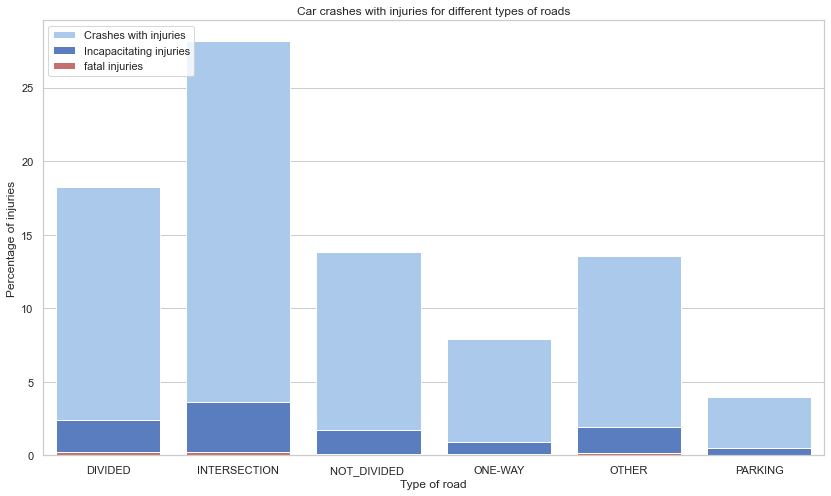

In [42]:
# Car crashes/car crashes with injuries and different types of roads
reason = "modif_ROAD_TYPE"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "fatal injuries")
ax.legend(loc="upper left", frameon=True)
ax.set_xlabel("Type of road")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with injuries for different types of roads")
plt.savefig("./img/Injuries_road_types.png")


### Influence of light to car crashes

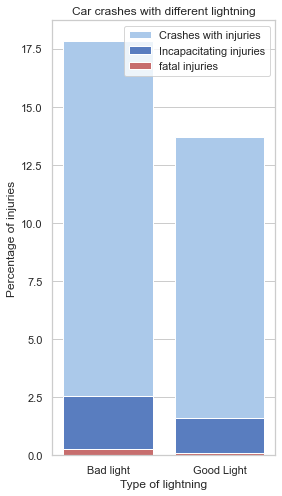

In [43]:
# Was it good lightning or not?

reason = "modif_DAYLIGHT"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(4, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "fatal injuries")

ax.legend( loc="upper right", frameon=True)
ax.set_xlabel("Type of lightning")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with different lightning")
x_labels = ["Bad light", "Good Light"]
ax.set_xticklabels(x_labels)
plt.savefig("./img/Injuries_lightning.png")



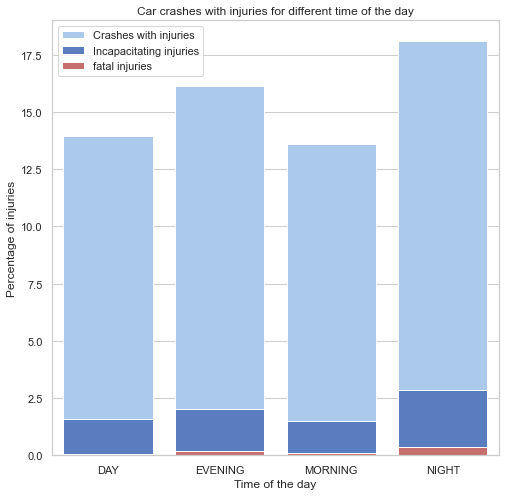

In [44]:
# Different time of the day

reason = "modif_CRASH_HOUR"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "fatal injuries")

ax.legend(loc="upper left", frameon=True)
ax.set_xlabel("Time of the day")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with injuries for different time of the day")
plt.savefig("./img/Injuries_time_of_day.png")

### Seatbelt

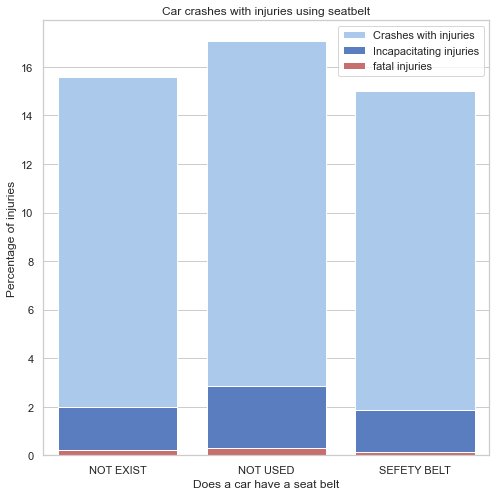

In [45]:
reason = "modif_SAFETY_EQUIPMENT"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "fatal injuries")
ax.legend(loc="upper right", frameon=True)
ax.set_xlabel("Does a car have a seat belt")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with injuries using seatbelt")
plt.savefig("./img/Injuries_seatbelt.png")

### Traffic control

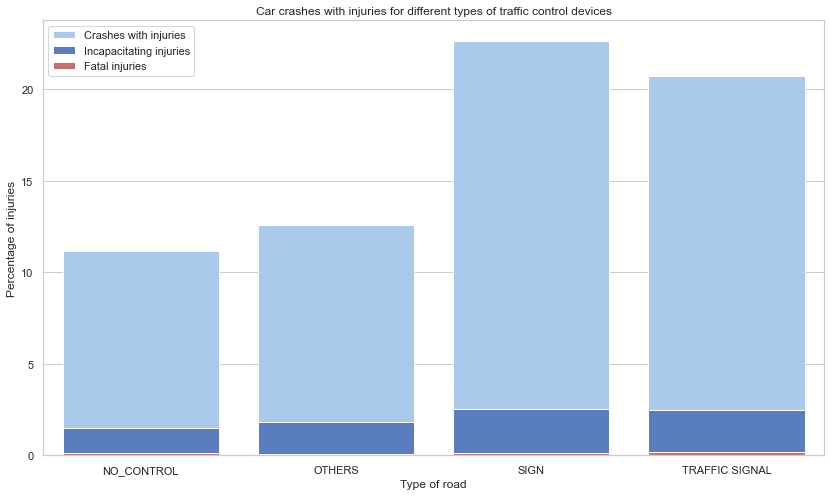

In [46]:
# Car crashes/car crashes with injuries and different types of roads
reason = "modif_TRAFFIC_CONTROL"
overall = df_fin.groupby(reason).count()["FIRST_CRASH_TYPE"]
with_reason = df_fin[df_fin["modif_INJURIES_TOTAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
heavy_injuries = df_fin[df_fin["modif_INJURIES_INCAPACITATING"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
fatal_injuries = df_fin[df_fin["modif_INJURIES_FATAL"] > 0].groupby(reason).count()["FIRST_CRASH_TYPE"]
result = with_reason/overall*100
result2 = heavy_injuries/overall*100
result3 = fatal_injuries/overall*100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = result.index, 
            y =  result, 
            color="b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(x = result2.index, 
            y =  result2, 
            color="b", label = "Incapacitating injuries")
sns.barplot(x = result3.index, 
            y =  result3, 
            color="r", label = "Fatal injuries")
ax.legend(loc="upper left", frameon=True)
ax.set_xlabel("Type of road")
ax.set_ylabel("Percentage of injuries")
ax.set_title("Car crashes with injuries for different types of traffic control devices")
plt.savefig("./img/Injuries_traffic control.png")

### Lets see dependancy between car crashes and months of year.

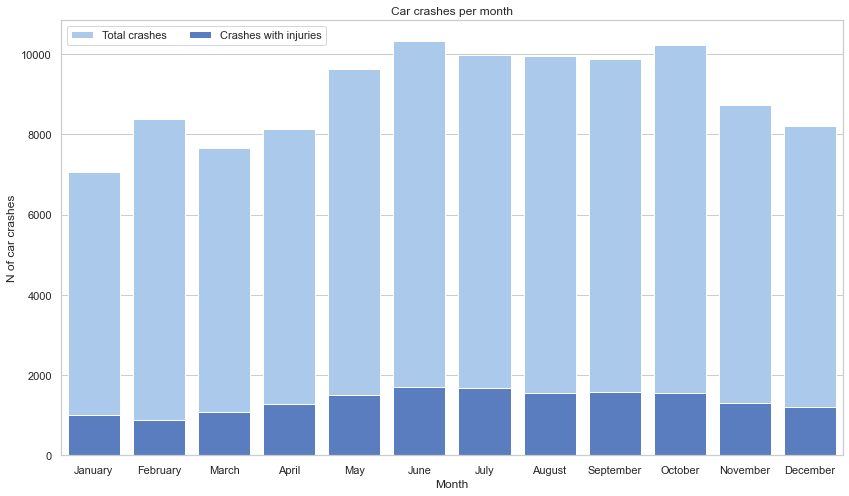

In [47]:
# Car crashes/car crashes with injuries and months
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.set_color_codes("pastel")
sns.barplot(data = df_checkpoint, x = df_checkpoint.groupby("CRASH_MONTH")["INJURIES_TOTAL"].count().index, 
            y =  df_checkpoint.groupby("CRASH_MONTH")["INJURIES_TOTAL"].count(), 
            color="b", label = "Total crashes")
sns.set_color_codes("muted")
sns.barplot(data = df_checkpoint, x = df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_TOTAL"].count().index, 
            y =  df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_TOTAL"].count(), 
            color = "b", label = "Crashes with injuries")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Month")
ax.set_ylabel("N of car crashes")
ax.set_title("Car crashes per month")
ax.set_xticklabels(x_labels);
plt.savefig("./img/Car_crashes_per_month.png")



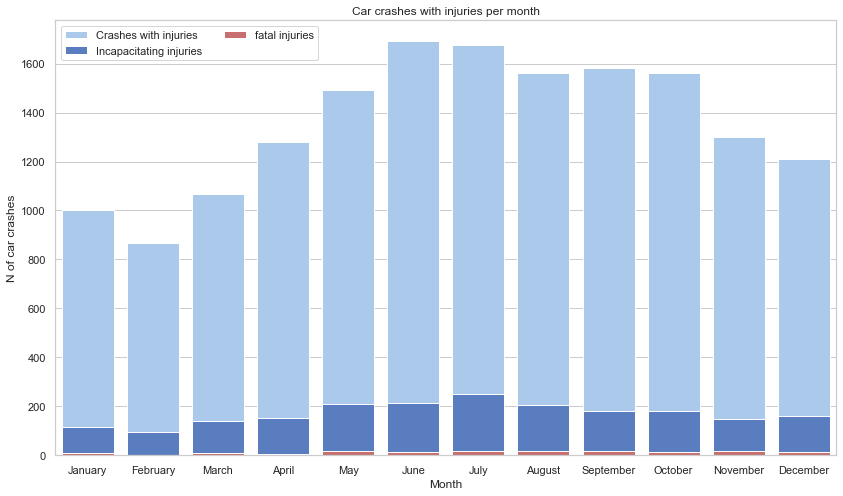

In [48]:

# Car car crashes with different injuries and months
fig, ax = plt.subplots(figsize=(14, 8))
x_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.set_color_codes("pastel")
sns.barplot(data = df_checkpoint, x = df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_TOTAL"].count().index, 
            y =  df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_TOTAL"].count(), 
            color = "b", label = "Crashes with injuries")
sns.set_color_codes("muted")
sns.barplot(data = df_checkpoint, x = df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_INCAPACITATING"].count().index, 
            y =  df_checkpoint[df_checkpoint["INJURIES_INCAPACITATING"] > 0].groupby("CRASH_MONTH")["INJURIES_INCAPACITATING"].count(), 
            color = "b", label = "Incapacitating injuries")
sns.barplot(data = df_checkpoint, x = df_checkpoint[df_checkpoint["INJURIES_TOTAL"] > 0].groupby("CRASH_MONTH")["INJURIES_FATAL"].count().index, 
            y =  df_checkpoint[df_checkpoint["INJURIES_FATAL"] > 0].groupby("CRASH_MONTH")["INJURIES_FATAL"].count(), 
            color = "r", label = "fatal injuries")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Month")
ax.set_ylabel("N of car crashes")
ax.set_title("Car crashes with injuries per month")
ax.set_xticklabels(x_labels);
plt.savefig("./img/Car_crasheswithinjuries_per_month.png")


# Data Modeling

In [49]:
injury_1 = df_fin.copy()

injury_1 = injury_1.drop("modif_INJURIES_FATAL", axis =1)
injury_1 = injury_1.drop("modif_INJURIES_INCAPACITATING", axis =1)

injury_1.modif_INJURIES_TOTAL.value_counts(normalize = True)

0    0.849758
1    0.150242
Name: modif_INJURIES_TOTAL, dtype: float64

In [50]:
# Lets define function to check our models.
def get_score2(df, predict,  model = LogisticRegression(max_iter = 1000),cv = 3, grid_search = False, grid = None):

    
    # Timing, for debugging and comparison purposes
    start = time.time()
    
    # Defince our y and X
    y = df[predict]
    X = df.drop(predict, axis = 1)
    
    
    print(y.value_counts())
    # Split data to train and test. Train data will be used for model validation, test data for model verification.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
    # Define our model
    model_used = model
    
    # One hot encode of categorical data. There is no numerical in this dataset so we will OHE before splitting to 
    # train and validation. 
    ohe = OneHotEncoder(drop = 'first', handle_unknown= "ignore")
    ohe.fit(X_train)
    X_train_ohe = pd.DataFrame(ohe.transform(X_train).todense(), columns = ohe.get_feature_names_out())
    X_test_ohe = pd.DataFrame(ohe.transform(X_test).todense(), columns = ohe.get_feature_names_out())
    
    
    
    # Imbalance problem
    X_train_sm, y_train_sm = sm.fit_resample(X_train_ohe, y_train)
    
    cv_results = cross_validate(model_used, X = X_train_sm, y = y_train_sm, scoring = ["recall", "accuracy"], cv = StratifiedKFold(n_splits=cv), return_train_score=True, return_estimator = True)
    estimator = cv_results["estimator"][0]
    train_accuracy =np.mean(cv_results["train_accuracy"]) 
    train_recall = np.mean(cv_results["train_recall"]) 
    validation_accuracy = np.mean(cv_results["test_accuracy"]) 
    validation_recall = np.mean(cv_results["test_recall"]) 
    fit_time = np.mean(cv_results["fit_time"])
    
    # Predictions
    y_train_hat = estimator.predict(X_train_sm)
    y_test_hat = estimator.predict(X_test_ohe)
    
    # Test results
    test_accuracy = accuracy_score(y_test, y_test_hat)
    test_recall = recall_score(y_test, y_test_hat)
    
    print(f"Train accuracy: {train_accuracy}")
    print(f"Train recall: {train_recall}")
    print(f"Validation accuracy: {validation_accuracy}")
    print(f"Validation recall:: {validation_recall}")
    print(f"Test accuracy: {test_accuracy}")
    print(f"test recall: {test_recall}")
    
    print(f"classification_report for test data:")
    
    print(classification_report(y_test, y_test_hat))  
    print(f"confusion matrix:")
    cf = confusion_matrix(y_test, y_test_hat)
    ConfusionMatrixDisplay.from_estimator(estimator = estimator, X = X_test_ohe, y = y_test)
    end = time.time()
    print ("Time elapsed:", end - start)
    
    return (train_accuracy, train_recall, validation_accuracy,validation_recall, test_accuracy, test_recall, end - start, estimator)



0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.8740689300562635
Train recall: 0.2506709424271109
Validation accuracy: 0.8735465503418905
Validation recall:: 0.2487589569341707
Test accuracy: 0.8748156342182891
test recall: 0.24244694132334582
classification_report for test data:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     23115
           1       0.73      0.24      0.36      4005

    accuracy                           0.87     27120
   macro avg       0.81      0.61      0.65     27120
weighted avg       0.86      0.87      0.85     27120

confusion matrix:
Time elapsed: 6.9082300662994385


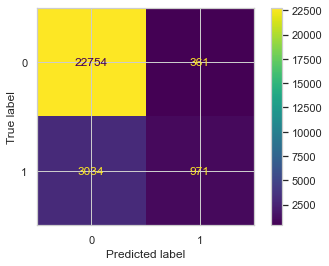

In [51]:
# Lets check performance of our model based on data. 
sm = SMOTE(sampling_strategy = "not minority", random_state = 42)
xc= get_score2(injury_1, "modif_INJURIES_TOTAL");

In [52]:
# Performance 
# While model has better performance than just predicting all values be the same class, 
# it has low recall that means that it often predict that there was no injury, but it actually happened.
# That could be due to 3 major reasons: 1) Not sufficient data 2) Wrong model used 3) Class imbalance





In [53]:
# Lets try other models with default values and compare their performance:
Model_list = {"Logistic Regression": LogisticRegression(max_iter = 1000), "Decision tree": DecisionTreeClassifier() ,
              "Random Forest": RandomForestClassifier(), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(use_label_encoder=False)}




0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.8740689300562635
Train recall: 0.2506709424271109
Validation accuracy: 0.8735465503418905
Validation recall:: 0.2487589569341707
Test accuracy: 0.8748156342182891
test recall: 0.24244694132334582
classification_report for test data:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     23115
           1       0.73      0.24      0.36      4005

    accuracy                           0.87     27120
   macro avg       0.81      0.61      0.65     27120
weighted avg       0.86      0.87      0.85     27120

confusion matrix:
Time elapsed: 9.002882957458496
0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.9946163866064772
Train recall: 0.9653054417334586
Validation accuracy: 0.793431517442897
Validation recall:: 0.3712678423454905
Test accuracy: 0.7942477876106194
test recall: 0.3780274656679151
classification_report for test dat

,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.8741,0.2507,0.8735,0.2488,0.8748,0.2424,9.0029
0,Decision tree,0.9946,0.9653,0.7934,0.3713,0.7942,0.378,5.336
0,Random Forest,0.9946,0.9693,0.8667,0.256,0.8673,0.2497,40.421
0,Naive Bayes,0.8578,0.3512,0.857,0.3487,0.8593,0.3513,1.4651
0,Gradient Boosting,0.8748,0.2299,0.8736,0.2261,0.8758,0.2255,33.2325
0,Ada Boost,0.8731,0.2577,0.8732,0.2571,0.8736,0.2509,15.4359
0,XGBClassifier,0.8854,0.3016,0.872,0.2538,0.8736,0.2487,42.1856


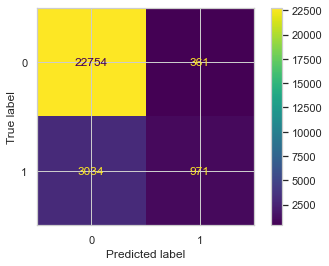

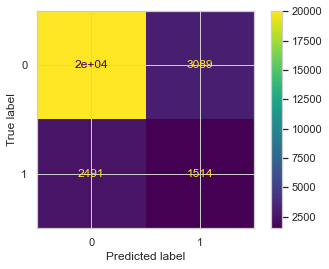

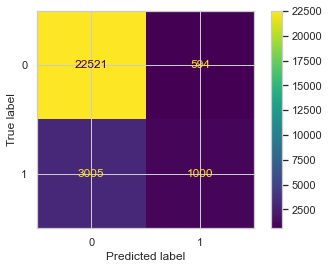

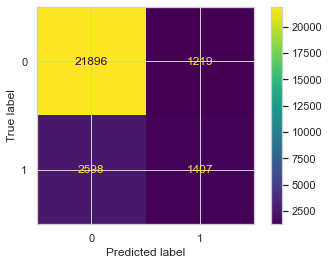

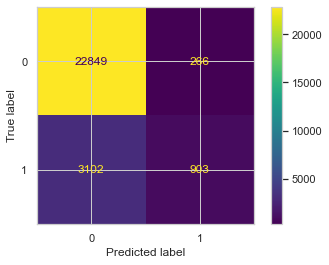

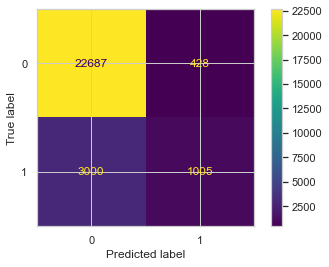

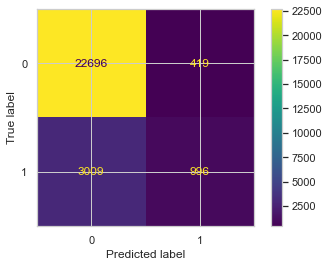

In [54]:
columns_check = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
sm = SMOTE(sampling_strategy = "not minority", random_state = 42)

Different_models = pd.DataFrame(columns = columns_check)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models = pd.concat([Different_models,line], axis = 0)

Different_models

In [55]:
Different_models

,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.8741,0.2507,0.8735,0.2488,0.8748,0.2424,9.0029
0,Decision tree,0.9946,0.9653,0.7934,0.3713,0.7942,0.378,5.336
0,Random Forest,0.9946,0.9693,0.8667,0.256,0.8673,0.2497,40.421
0,Naive Bayes,0.8578,0.3512,0.857,0.3487,0.8593,0.3513,1.4651
0,Gradient Boosting,0.8748,0.2299,0.8736,0.2261,0.8758,0.2255,33.2325
0,Ada Boost,0.8731,0.2577,0.8732,0.2571,0.8736,0.2509,15.4359
0,XGBClassifier,0.8854,0.3016,0.872,0.2538,0.8736,0.2487,42.1856


In [56]:
# While all models have low values for Test Recall (our major characteristics), we can see that 2 model
# have better performance. Decision tree tends to overfit on training sample, but still performance is good
# on test sample. Naive Bayese have good recall performance and have better accuracy score on test data





### Solving inbalance problem

In [57]:
# In our original dataset records with injuries represent around 15%
# We will use 3 strategies:  
# 1) Increase this proportion of injury crash records by artificial creating samples (SMOTE)
# to 50% and increase the weight of such records to 2 compare to weight 1 for crash records without injuries

Model_list = {"Logistic Regression": LogisticRegression(class_weight = {1:2, 0:1}, max_iter = 1000), "Decision tree": DecisionTreeClassifier(class_weight = {1:2, 0:1}) ,
              "Random Forest": RandomForestClassifier(class_weight = {1:2, 0:1}), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(class_weight = {1:2, 0:1}, use_label_encoder=False)}



0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.7369567053055062
Train recall: 0.7700973760116008
Validation accuracy: 0.7344904867002345
Validation recall:: 0.7634661092879768
Test accuracy: 0.7216445427728614
test recall: 0.718601747815231
classification_report for test data:
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     23115
           1       0.31      0.72      0.43      4005

    accuracy                           0.72     27120
   macro avg       0.62      0.72      0.62     27120
weighted avg       0.84      0.72      0.76     27120

confusion matrix:
Time elapsed: 18.373144149780273
0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.9957576159997837
Train recall: 0.9975385315617213
Validation accuracy: 0.8305364908263986
Validation recall:: 0.7460381503905543
Test accuracy: 0.8468289085545723
test recall: 0.2272159800249688
classification_report for test dat

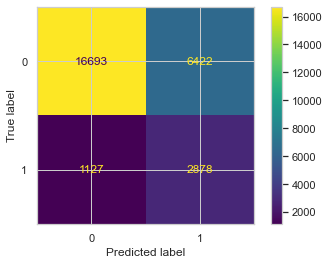

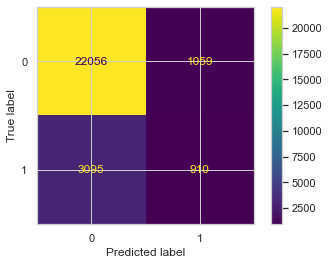

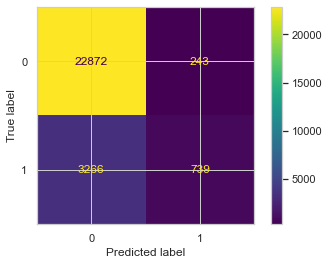

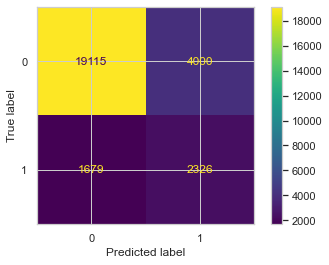

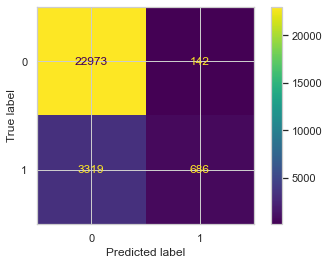

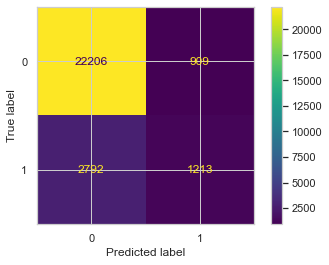

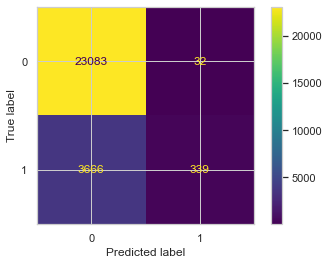

In [58]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_1 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_1 = pd.concat([Different_models_imbalance_1,line], axis = 0)



In [59]:
# Results for imbalance problem solution: SMOTE 50%, class weight 2-1

Different_models_imbalance_1

,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.737,0.7701,0.7345,0.7635,0.7216,0.7186,18.3731
0,Decision tree,0.9958,0.9975,0.8305,0.746,0.8468,0.2272,8.8565
0,Random Forest,0.9957,0.9955,0.8888,0.7422,0.8706,0.1845,51.3467
0,Naive Bayes,0.7494,0.5897,0.7489,0.5869,0.7906,0.5808,5.4991
0,Gradient Boosting,0.8765,0.6738,0.8596,0.6241,0.8724,0.1713,51.51
0,Ada Boost,0.8305,0.6228,0.8126,0.5682,0.8635,0.3029,23.8767
0,XGBClassifier,0.9102,0.7645,0.8763,0.6758,0.8636,0.0846,56.3439


In [60]:
# 2) Increase proportion of injury crash records by artificial creating samples (SMOTE) to 50%
# We won't change the weight of classes.

In [61]:
Model_list = {"Logistic Regression": LogisticRegression(max_iter = 1000), "Decision tree": DecisionTreeClassifier() ,
              "Random Forest": RandomForestClassifier(), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(use_label_encoder=False)}


0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.7691535722973019
Train recall: 0.5157536415318386
Validation accuracy: 0.7659102768909777
Validation recall:: 0.5081374410550726
Test accuracy: 0.8310103244837758
test recall: 0.5001248439450686
classification_report for test data:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     23115
           1       0.44      0.50      0.47      4005

    accuracy                           0.83     27120
   macro avg       0.67      0.69      0.68     27120
weighted avg       0.84      0.83      0.84     27120

confusion matrix:
Time elapsed: 14.90531301498413
0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.9957817478562475
Train recall: 0.9878374235800687
Validation accuracy: 0.8309708716502838
Validation recall:: 0.7431133941235978
Test accuracy: 0.843141592920354
test recall: 0.2149812734082397
classification_report for test data

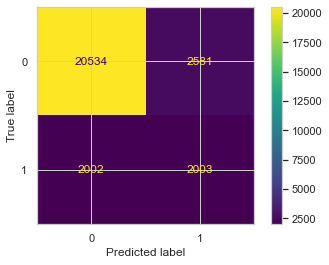

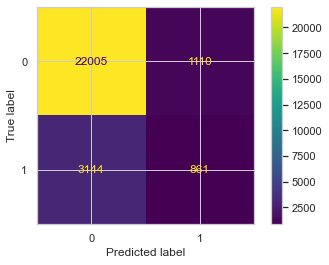

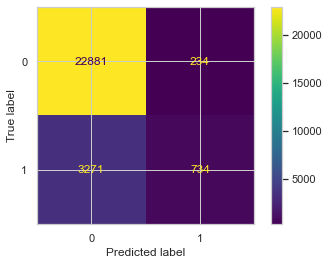

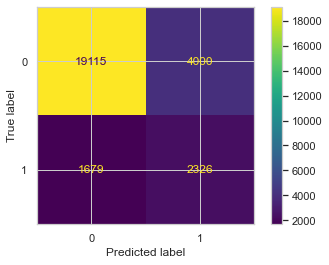

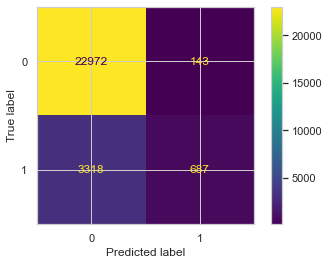

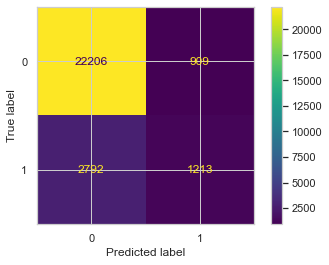

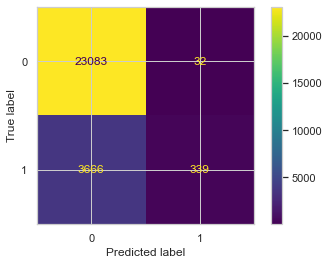

In [62]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_2 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_2 = pd.concat([Different_models_imbalance_2,line], axis = 0)


In [63]:
# Results for imbalance problem solution: SMOTE 50%

Different_models_imbalance_2

,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.7692,0.5158,0.7659,0.5081,0.831,0.5001,14.9053
0,Decision tree,0.9958,0.9878,0.831,0.7431,0.8431,0.215,8.509
0,Random Forest,0.9958,0.9906,0.8888,0.7409,0.8708,0.1833,49.016
0,Naive Bayes,0.7494,0.5897,0.7489,0.5869,0.7906,0.5808,4.9071
0,Gradient Boosting,0.8765,0.6738,0.8596,0.6241,0.8724,0.1715,49.5306
0,Ada Boost,0.8305,0.6228,0.8126,0.5682,0.8635,0.3029,27.1379
0,XGBClassifier,0.9102,0.7645,0.8763,0.6758,0.8636,0.0846,53.8973


In [64]:
# 3) Increase proportion of injury crash records by artificial creating samples (SMOTE) to 100%
# We won't change the weight of classes.

In [65]:
Model_list = {"Logistic Regression": LogisticRegression(max_iter = 1000), "Decision tree": DecisionTreeClassifier() ,
              "Random Forest": RandomForestClassifier(), "Naive Bayes":MultinomialNB(), "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "XGBClassifier" :XGBClassifier(use_label_encoder=False)}


0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.7497611169679027
Train recall: 0.7769854826914315
Validation accuracy: 0.748273450339496
Validation recall:: 0.7742417351435313
Test accuracy: 0.7228244837758112
test recall: 0.7166042446941323
classification_report for test data:
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     23115
           1       0.31      0.72      0.43      4005

    accuracy                           0.72     27120
   macro avg       0.62      0.72      0.62     27120
weighted avg       0.84      0.72      0.76     27120

confusion matrix:
Time elapsed: 19.433424949645996
0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.9968037463163201
Train recall: 0.9939767072842712
Validation accuracy: 0.8707672161827018
Validation recall:: 0.8695448860327214
Test accuracy: 0.8445796460176991
test recall: 0.23320848938826466
classification_report for test da

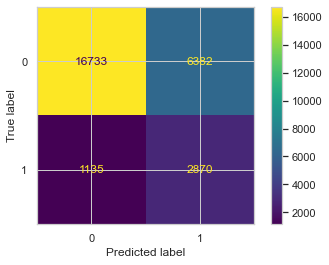

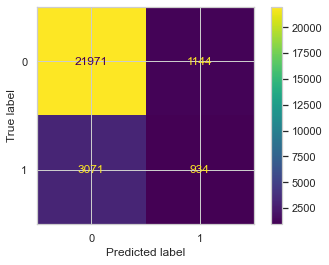

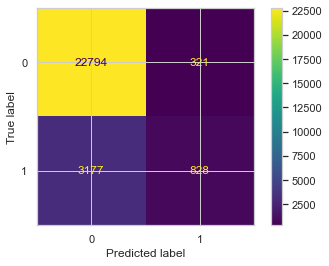

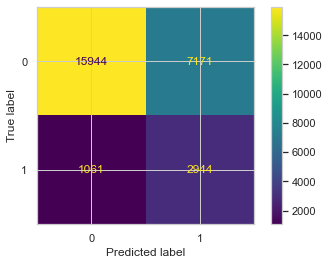

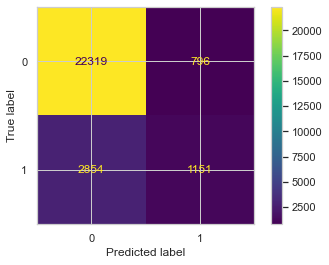

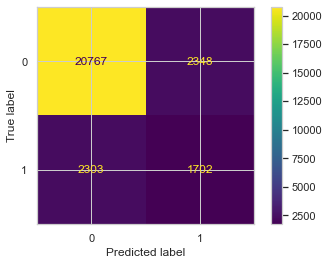

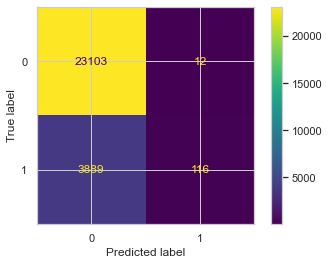

In [66]:
sm = SMOTE(sampling_strategy = 1, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Execution time"]
Different_models_imbalance_3 = pd.DataFrame(columns = columns_df)
for key, value in Model_list.items():
    results = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4)]]), columns = columns_check)
    Different_models_imbalance_3 = pd.concat([Different_models_imbalance_3,line], axis = 0)


In [67]:
# Results for imbalance problem solution: SMOTE 100%
Different_models_imbalance_3

,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.7498,0.777,0.7483,0.7742,0.7228,0.7166,19.4334
0,Decision tree,0.9968,0.994,0.8708,0.8695,0.8446,0.2332,11.5278
0,Random Forest,0.9968,0.9959,0.9198,0.884,0.871,0.2067,65.7127
0,Naive Bayes,0.7292,0.7696,0.7287,0.7688,0.6965,0.7351,5.4191
0,Gradient Boosting,0.8939,0.8746,0.876,0.839,0.8654,0.2874,72.3292
0,Ada Boost,0.8348,0.8319,0.8204,0.8035,0.8285,0.425,29.8762
0,XGBClassifier,0.9325,0.8847,0.8991,0.8239,0.8562,0.029,68.0388


In [68]:
# Display all results:
print("Imbalance problem 0.85/0.15")
display(Different_models) 
print("SMOTE 0.5, weight 1:2")
display(Different_models_imbalance_1) 
print("SMOTE 0.5")
display(Different_models_imbalance_2) 
print("SMOTE 1")
display(Different_models_imbalance_3) 



Imbalance problem 0.85/0.15


,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.8741,0.2507,0.8735,0.2488,0.8748,0.2424,9.0029
0,Decision tree,0.9946,0.9653,0.7934,0.3713,0.7942,0.378,5.336
0,Random Forest,0.9946,0.9693,0.8667,0.256,0.8673,0.2497,40.421
0,Naive Bayes,0.8578,0.3512,0.857,0.3487,0.8593,0.3513,1.4651
0,Gradient Boosting,0.8748,0.2299,0.8736,0.2261,0.8758,0.2255,33.2325
0,Ada Boost,0.8731,0.2577,0.8732,0.2571,0.8736,0.2509,15.4359
0,XGBClassifier,0.8854,0.3016,0.872,0.2538,0.8736,0.2487,42.1856


SMOTE 0.5, weight 1:2


,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.737,0.7701,0.7345,0.7635,0.7216,0.7186,18.3731
0,Decision tree,0.9958,0.9975,0.8305,0.746,0.8468,0.2272,8.8565
0,Random Forest,0.9957,0.9955,0.8888,0.7422,0.8706,0.1845,51.3467
0,Naive Bayes,0.7494,0.5897,0.7489,0.5869,0.7906,0.5808,5.4991
0,Gradient Boosting,0.8765,0.6738,0.8596,0.6241,0.8724,0.1713,51.51
0,Ada Boost,0.8305,0.6228,0.8126,0.5682,0.8635,0.3029,23.8767
0,XGBClassifier,0.9102,0.7645,0.8763,0.6758,0.8636,0.0846,56.3439


SMOTE 0.5


,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.7692,0.5158,0.7659,0.5081,0.831,0.5001,14.9053
0,Decision tree,0.9958,0.9878,0.831,0.7431,0.8431,0.215,8.509
0,Random Forest,0.9958,0.9906,0.8888,0.7409,0.8708,0.1833,49.016
0,Naive Bayes,0.7494,0.5897,0.7489,0.5869,0.7906,0.5808,4.9071
0,Gradient Boosting,0.8765,0.6738,0.8596,0.6241,0.8724,0.1715,49.5306
0,Ada Boost,0.8305,0.6228,0.8126,0.5682,0.8635,0.3029,27.1379
0,XGBClassifier,0.9102,0.7645,0.8763,0.6758,0.8636,0.0846,53.8973


SMOTE 1


,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Logistic Regression,0.7498,0.777,0.7483,0.7742,0.7228,0.7166,19.4334
0,Decision tree,0.9968,0.994,0.8708,0.8695,0.8446,0.2332,11.5278
0,Random Forest,0.9968,0.9959,0.9198,0.884,0.871,0.2067,65.7127
0,Naive Bayes,0.7292,0.7696,0.7287,0.7688,0.6965,0.7351,5.4191
0,Gradient Boosting,0.8939,0.8746,0.876,0.839,0.8654,0.2874,72.3292
0,Ada Boost,0.8348,0.8319,0.8204,0.8035,0.8285,0.425,29.8762
0,XGBClassifier,0.9325,0.8847,0.8991,0.8239,0.8562,0.029,68.0388


In [69]:
# The best models so far:
# Linear regression, naive bayese

### Adjusting hyper parameters

Reminder: We are focused on maximizing recall of our model.

We will adjust parameters for the following models:
1) Logistic regression:
+ This model shows good recall score with solved imbalance problem.
+ This models tend not to overfit
+ This model is easy to interprete, so we can find what parameters influence the most our prediction. 

2) Naive Bayese:
+ This model shows the best recall score with solved imbalance problem.
+ This models tend not to overfit
+ Speed performance allows us to make parameters tune within short period of time


##### Naive Bayese hyperparameters tuning 

In [70]:
# Lets start with Naive Bayes
# Define function that we will use in our model
def hyper_tune(df, predict,  model = LogisticRegression(max_iter = 1000), cv = 3, grid = None):
    # Timing, for debugging and comparison purposes
    start = time.time()
    
    # Defince our y and X
    y = df[predict]
    X = df.drop(predict, axis = 1)
    
    # Split data to train and test. Train data will be used for model validation, test data for model verification.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
    # Define our model
    model_used = model
    
    # One hot encode of categorical data. There is no numerical in this dataset so we will OHE before splitting to 
    # train and validation. 
    ohe = OneHotEncoder(drop = 'first', handle_unknown= "ignore")
    ohe.fit(X_train)
    X_train_ohe = pd.DataFrame(ohe.transform(X_train).todense(), columns = ohe.get_feature_names_out())
    X_test_ohe = pd.DataFrame(ohe.transform(X_test).todense(), columns = ohe.get_feature_names_out())
    
    # Imbalance problem
    X_train_sm, y_train_sm = sm.fit_resample(X_train_ohe, y_train)
    
    # GridSearch
    grid_results = GridSearchCV(estimator = model, param_grid = grid, scoring = ("recall", "accuracy"), refit = "recall")
    grid_results.fit(X_train_sm, y_train_sm)
    
    return (grid_results, X_test_ohe, y_test)






In [71]:
# Define class imbalance problem solving strategy as number 3 that we used before.
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = MultinomialNB()
tune_grid = {"alpha":[0.01, 0.1, 0.5, 1, 10]}

results = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)


In [72]:
# Best parameters for our prediction model
print(f"Best parameter:", results[0].best_params_)
print(f"Best recall {results[0].best_score_}")
X_test_recall = recall_score(results[2], results[0].best_estimator_.predict(results[1]))
print(f"prediction on test set:",round(X_test_recall,4))


Best parameter: {'alpha': 0.01}
Best recall 0.7690581336422211
prediction on test set: 0.7373


In [73]:
# Lets try different modification of Naive Bayes from SKLearn library
# ComplementNB, BernoulliNB, GaussianNB

In [74]:
# ComplementNB
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = ComplementNB()
tune_grid = {"alpha":[0.01, 0.1, 0.5, 1, 10]}

results = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)
print(f"Best parameter:", results[0].best_params_)
print(f"Best recall {results[0].best_score_}")
X_test_recall = recall_score(results[2], results[0].best_estimator_.predict(results[1]))
print(f"prediction on test set:",round(X_test_recall,4))

Best parameter: {'alpha': 0.01}
Best recall 0.7690581336422211
prediction on test set: 0.7373


In [75]:
#BernoulliNB
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = BernoulliNB()
tune_grid = {"alpha":[0.01, 0.1, 0.5, 1, 10]}

results = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)
print(f"Best parameter:", results[0].best_params_)
print(f"Best recall {results[0].best_score_}")
X_test_recall = recall_score(results[2], results[0].best_estimator_.predict(results[1]))
print(f"prediction on test set:",round(X_test_recall,4))

Best parameter: {'alpha': 0.01}
Best recall 0.7965829291247376
prediction on test set: 0.6986


In [76]:
#GaussianNB
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = GaussianNB()
tune_grid = {"var_smoothing":[0.01, 0.1, 0.5, 1, 10, 100]}

results = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)
print(f"Best parameter:", results[0].best_params_)
print(f"Best recall {results[0].best_score_}")
X_test_recall = recall_score(results[2], results[0].best_estimator_.predict(results[1]))
print(f"prediction on test set:",round(X_test_recall,4))

Best parameter: {'var_smoothing': 100}
Best recall 0.9875190038369652
prediction on test set: 0.9788


In [77]:
# impressive recall score. Lets check full report to investigate this case in more details.
results[0].cv_results_

{'mean_fit_time': array([0.25360184, 0.23457179, 0.21730304, 0.20488353, 0.21473508,
        0.20390496]),
 'std_fit_time': array([0.08157724, 0.04661741, 0.00936078, 0.00748039, 0.01066458,
        0.00475418]),
 'mean_score_time': array([0.05584598, 0.05938859, 0.05343857, 0.05589976, 0.05570202,
        0.05255775]),
 'std_score_time': array([0.00411622, 0.0075843 , 0.00338794, 0.00348271, 0.00591039,
        0.00399211]),
 'param_var_smoothing': masked_array(data=[0.01, 0.1, 0.5, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'var_smoothing': 0.01},
  {'var_smoothing': 0.1},
  {'var_smoothing': 0.5},
  {'var_smoothing': 1},
  {'var_smoothing': 10},
  {'var_smoothing': 100}],
 'split0_test_recall': array([0.75624412, 0.7973648 , 0.88250199, 0.92760443, 0.98783754,
        0.99268805]),
 'split1_test_recall': array([0.82386158, 0.84833128, 0.89278216, 0.92260914, 0.98067038,
        0.986244

In [78]:
finall_model_selection = pd.DataFrame(columns = columns_df)


0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.7417179662077835
Train recall: 0.8421125934737986
Validation accuracy: 0.7408529444655692
Validation recall:: 0.839918973080764
Test accuracy: 0.6462389380530974
test recall: 0.7782771535580524
classification_report for test data:
              precision    recall  f1-score   support

           0       0.94      0.62      0.75     23115
           1       0.26      0.78      0.39      4005

    accuracy                           0.65     27120
   macro avg       0.60      0.70      0.57     27120
weighted avg       0.84      0.65      0.70     27120

confusion matrix:
Time elapsed: 6.352676868438721


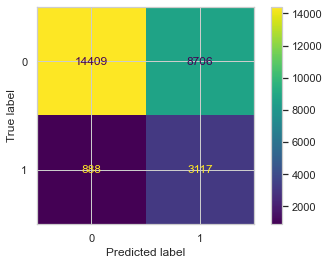

In [79]:
# It might looks like a good result, but we should remember that model performs training/testing splits on modified dataset.
# For finall validation we will check the model using our old function and visially inspect confusion matrix.
# Plug in the values into the function that we used before, to see the full confusion matrix
Model_list = {"Naive Bayes Tuned": GaussianNB(var_smoothing = 0.1)}
sm = SMOTE(sampling_strategy = 1, random_state = 42)

for key, value in Model_list.items():
    resultsNB = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(resultsNB[0], 4), round(resultsNB[1], 4), round(resultsNB[2], 4), round(resultsNB[3], 4), round(resultsNB[4],4), round(resultsNB[5],4), round(resultsNB[6],4)]]), columns = columns_check)
    finall_model_selection = pd.concat([finall_model_selection,line], axis = 0)


##### Logistic regression hyperparameters tuning 

In [80]:
#  We define our grid and start parameters tuning. 
sm = SMOTE(sampling_strategy = 1, random_state = 42)
model = LogisticRegression()
tune_grid = {"max_iter":[1000],
             "penalty": ["l2", "elasticnet"], 
             "C" : [0.001, 0.01, 0.1, 1, 10, 100],
             "solver":["lbfgs", "saga", "liblinear"]}

results_logistic = hyper_tune(injury_1, "modif_INJURIES_TOTAL", model, cv = 4, grid = tune_grid)

results_logistic[0]

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000], 'penalty': ['l2', 'elasticnet'],
                         'solver': ['lbfgs', 'saga', 'liblinear']},
             refit='recall', scoring=('recall', 'accuracy'))

In [81]:
cv_results = pd.DataFrame(results_logistic[0].cv_results_)


In [82]:
params_logistic = results_logistic[0].best_params_

In [83]:
# Parameters of the best logistic regression after search for the best hyper parameters
params_logistic

{'C': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

0    92180
1    16298
Name: modif_INJURIES_TOTAL, dtype: int64
Train accuracy: 0.7347173143985216
Train recall: 0.7842178003888307
Validation accuracy: 0.73374364729704
Validation recall:: 0.7826395826212358
Test accuracy: 0.6966076696165192
test recall: 0.7510611735330837
classification_report for test data:
              precision    recall  f1-score   support

           0       0.94      0.69      0.79     23115
           1       0.29      0.75      0.42      4005

    accuracy                           0.70     27120
   macro avg       0.62      0.72      0.61     27120
weighted avg       0.85      0.70      0.74     27120

confusion matrix:
Time elapsed: 10.103663921356201


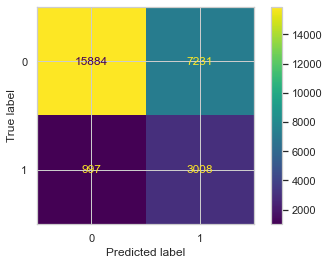

In [84]:
Model_list = {"Logistic regression tuned": LogisticRegression(C =0.001, max_iter=1000, penalty="l2", solver = 'liblinear')}
sm = SMOTE(sampling_strategy = 1, random_state = 42)

for key, value in Model_list.items():
    results_logistic_tuned = get_score2(injury_1, "modif_INJURIES_TOTAL", value);
    line = pd.DataFrame(np.array([[key, round(results_logistic_tuned[0], 4), round(results_logistic_tuned[1], 4), round(results_logistic_tuned[2], 4), round(results_logistic_tuned[3], 4), round(results_logistic_tuned[4],4), round(results_logistic_tuned[5],4), round(results_logistic_tuned[6],4)]]), columns = columns_check)
    finall_model_selection = pd.concat([finall_model_selection,line], axis = 0)


### Final model selection:

In [85]:
final_model = pd.concat([finall_model_selection, 
                        pd.DataFrame(Different_models_imbalance_3.iloc[0]).T, 
                        pd.DataFrame(Different_models_imbalance_3.iloc[1]).T,
                        pd.DataFrame(Different_models_imbalance_3.iloc[3]).T], axis = 0)
final_model

,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Execution time
0,Naive Bayes Tuned,0.7417,0.8421,0.7409,0.8399,0.6462,0.7783,6.3527
0,Logistic regression tuned,0.7347,0.7842,0.7337,0.7826,0.6966,0.7511,10.1037
0,Logistic Regression,0.7498,0.777,0.7483,0.7742,0.7228,0.7166,19.4334
0,Decision tree,0.9968,0.994,0.8708,0.8695,0.8446,0.2332,11.5278
0,Naive Bayes,0.7292,0.7696,0.7287,0.7688,0.6965,0.7351,5.4191


In [86]:
# Our finall model list include 
# We will proceed with logistic regression tuned (model 2 from our list)
final_model = results_logistic_tuned[7]

# We considered the following:
# 1) Good recall perfromance(our target metrics) with good accuracy score. 
# 2) Well feneralize and perform with unseen data(test data)
# 3) Easy to interprete output factors
# 4) Fast performance. 




In [87]:
final_model.coef_[0]

array([-1.85548067e-02, -5.56332431e-02,  1.11780471e-01, -4.55766707e-03,
       -1.10241628e-01,  1.31300670e-02, -1.10052369e+00,  7.80085657e-01,
        1.19835392e+00, -2.03463713e-01, -2.03384464e-01, -4.27712948e-02,
       -9.90918406e-02, -1.43646371e-01, -8.31006042e-01,  2.92520683e-04,
       -1.60529914e-01,  2.15710032e-01, -3.09502506e-01,  2.77562078e-01,
       -1.63178025e-01,  1.35230872e-01,  1.57670622e-01, -1.69586235e-02,
        2.76012243e-02,  3.93543539e-02, -5.57955966e-01,  2.83060330e-01,
        4.14391522e-02, -9.64559031e-02,  3.67013942e-02, -1.09592933e-02,
        2.52240182e-01, -6.70155934e-02, -3.75487679e-01, -1.45090966e-01,
       -3.95873425e-01, -3.73506567e-01,  4.57772492e-01, -1.03149784e-01,
       -1.13382026e-01,  3.49100218e-02,  1.06587456e-01, -3.38742875e-02,
        4.02688037e-02, -2.24009971e-01,  3.54495649e-02,  9.72753683e-03,
       -3.49261817e-02,  5.25848392e-02,  3.10048943e-02,  5.03379406e-02,
       -8.32168115e-02, -

#### We will proceed with logistic regression tuned (model 2 from our list)

### Breakdown into different parameters that influence our model performance

In [101]:

list_factors = []

for i in list(range(len(final_model.feature_names_in_))):
    tu = tuple([final_model.feature_names_in_[i], final_model.coef_[0][i]])
    list_factors.append(tu)
    



In [102]:
# Negative influence (reduce probablilty of injuries during car crash)
Biggest_negative_influence = sorted(list_factors, key = lambda x : x[1])[:10]



In [103]:
# Positive influence (increase probablilty of injuries during car crash)

Biggest_influence = sorted(list_factors, key = lambda x : x[1], reverse = True)[:10]

In [104]:
Biggest_negative_influence = pd.DataFrame(Biggest_negative_influence, columns = ["Reason", "Influence"])

In [105]:
Biggest_influence = pd.DataFrame(Biggest_influence, columns = ["Reason", "Influence"])

In [106]:
Biggest_influence

,Reason,Influence
0,FIRST_CRASH_TYPE_PEDESTRIAN,1.198354
1,FIRST_CRASH_TYPE_PEDALCYCLIST,0.780086
2,modif_NUM_UNITS_MULTIPLE,0.457772
3,modif_PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD...,0.292097
4,"modif_DAMAGE_OVER $1,500",0.283060
5,modif_SPEED_ZONE_URBAN,0.277562
6,modif_PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRA...,0.275345
7,modif_ROAD_TYPE_INTERSECTION,0.252240
8,modif_PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITI...,0.240413
9,modif_PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUC...,0.235740


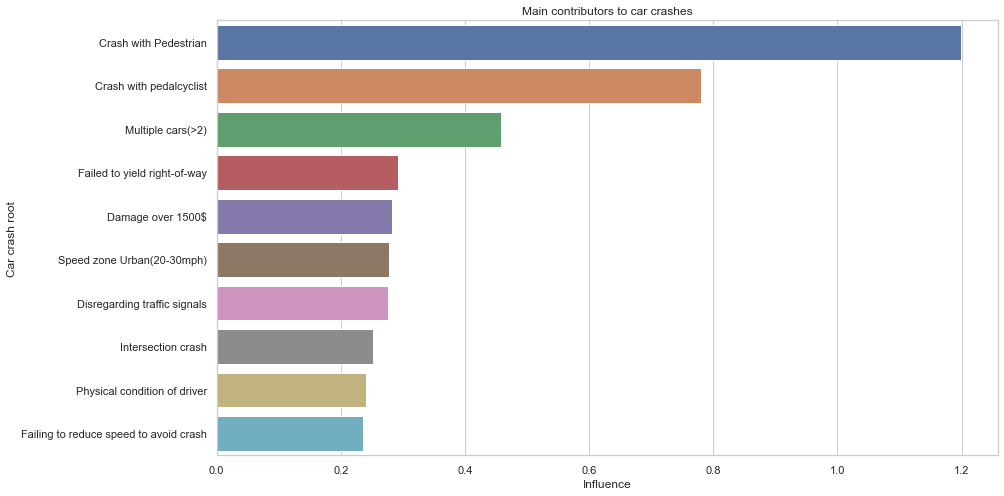

In [107]:
# Lets make a graph with main contributors
y_labels = ["Crash with Pedestrian", "Crash with pedalcyclist", "Multiple cars(>2)", "Failed to yield right-of-way", "Damage over 1500$", "Speed zone Urban(20-30mph)", "Disregarding traffic signals", "Intersection crash", "Physical condition of driver", "Failing to reduce speed to avoid crash" ]
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data = Biggest_influence, y = "Reason", x = "Influence", )
ax.set_xlabel("Influence")
ax.set_ylabel("Car crash root")
ax.set_title("Main contributors to car crashes")
ax.set_yticklabels(y_labels);
plt.savefig("./img/Main_contributors.png")


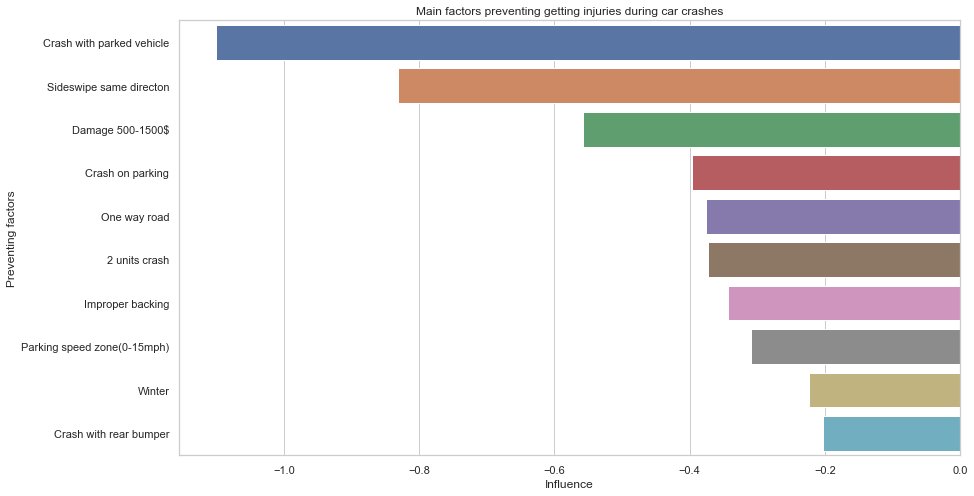

In [108]:
# Lets make a graph with parameters reduce the probability

y_labels = ["Crash with parked vehicle", "Sideswipe same directon", "Damage 500-1500$", "Crash on parking", "One way road", "2 units crash", "Improper backing", "Parking speed zone(0-15mph)", "Winter", "Crash with rear bumper" ]
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data = Biggest_negative_influence, y = "Reason", x = "Influence")
ax.set_xlabel("Influence")
ax.set_ylabel("Preventing factors")
ax.set_title("Main factors preventing getting injuries during car crashes")
ax.set_yticklabels(y_labels);
plt.savefig("./img/Main_preventive_factors.png")

# Conclusion
---
For our finalized model we used LinearRegression because of the following reasons: 
1) It is easy to interprete.

2) It have good recall compared to the other models, without much sacrifice in precision. 


Overall, this data tells us that injuries during car crashes can be predicted and we can see tha major factors that influence it. These modeling results correspond to our observations during data exploration phase